In [61]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load train dataset
df = pd.read_csv('Telecom_customer_churn.csv')
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### EDA

In [5]:
# Identify the duplicate records
df.duplicated().sum()

0

In [6]:
# Here TotalCharges should be numeric 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#From the above data we can see 11 null data that need to be removed
df.dropna(inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.shape

(7032, 21)

In [9]:
# Lets check unique values
col_name=[]
unique_value=[]

for i in df.columns:
    col_name.append(str(i))
    unique_value.append(df[i].nunique())

unique_data=pd.DataFrame()
unique_data['column_name']=col_name
unique_data['Value']=unique_value

unique_data=unique_data.sort_values('Value', ascending=False)
unique_data

,column_name,Value
0,customerID,7032
19,TotalCharges,6530
18,MonthlyCharges,1584
5,tenure,72
17,PaymentMethod,4
11,DeviceProtection,3
15,Contract,3
14,StreamingMovies,3
13,StreamingTV,3
12,TechSupport,3


In [10]:
# Here customerID has ony one unique value, so we can drop this column
df = df.drop('customerID', axis=1)

In [11]:
df.shape

(7032, 20)

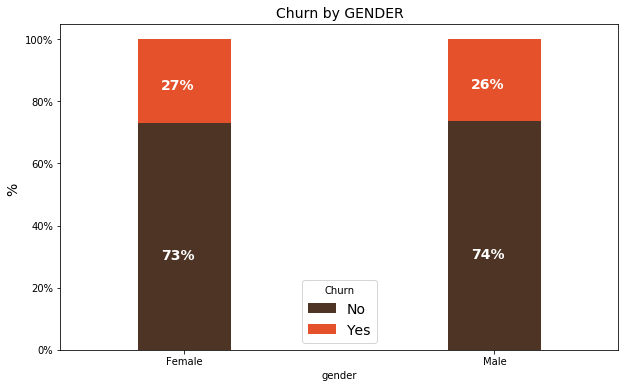

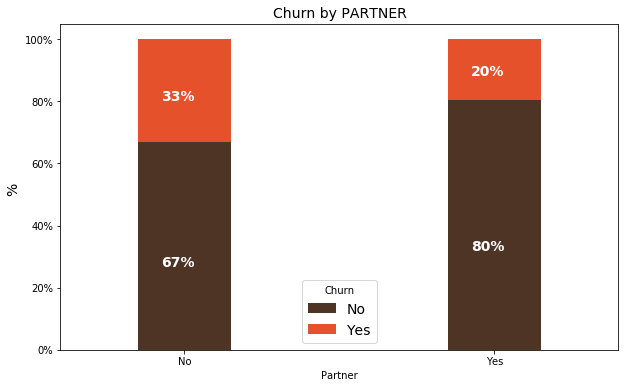

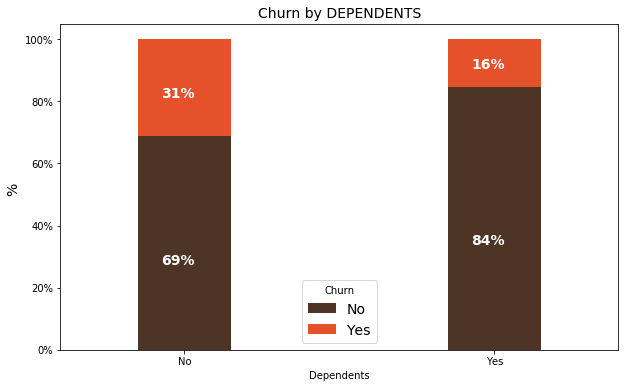

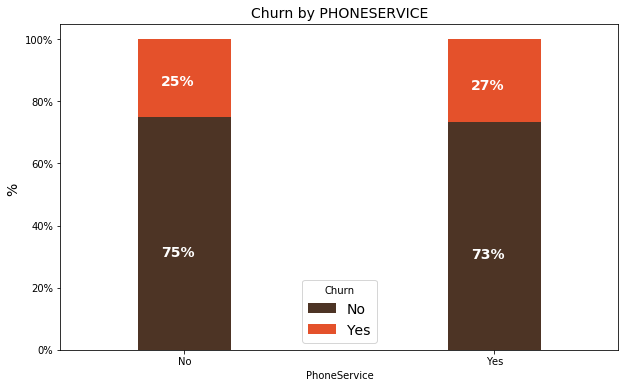

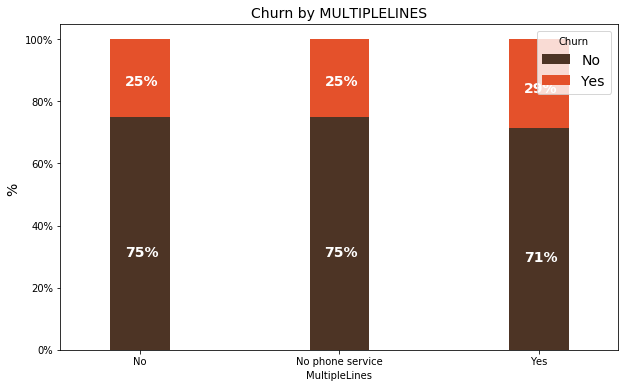

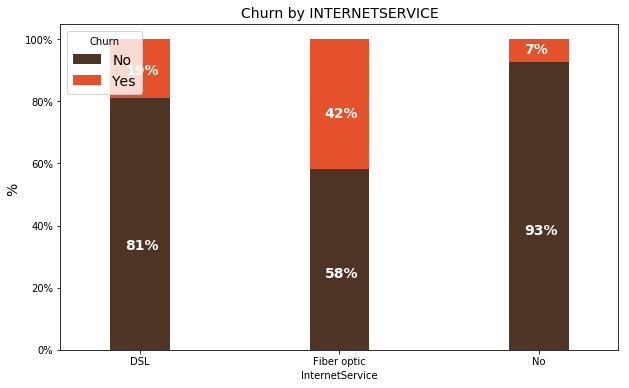

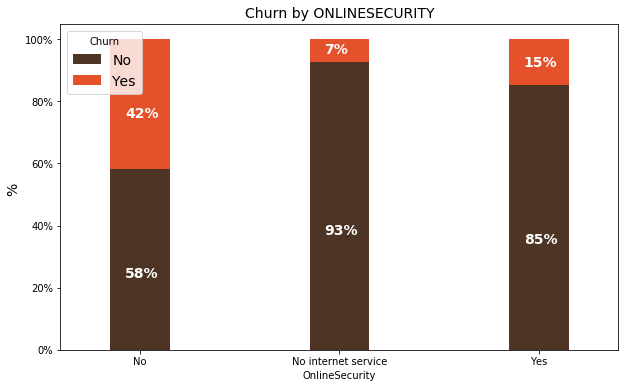

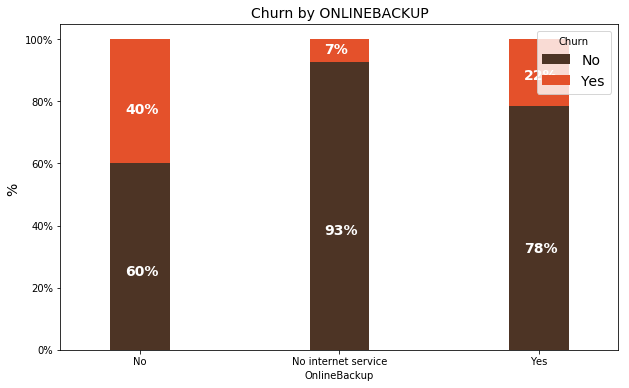

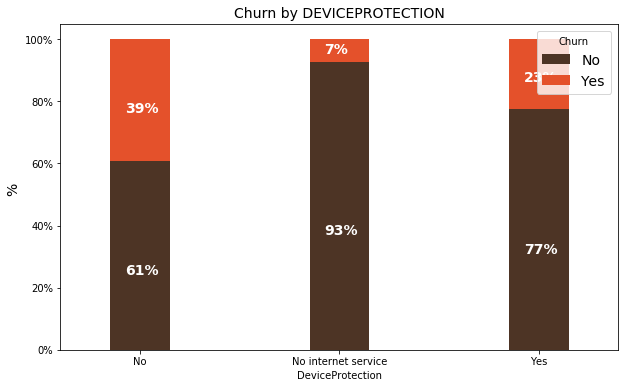

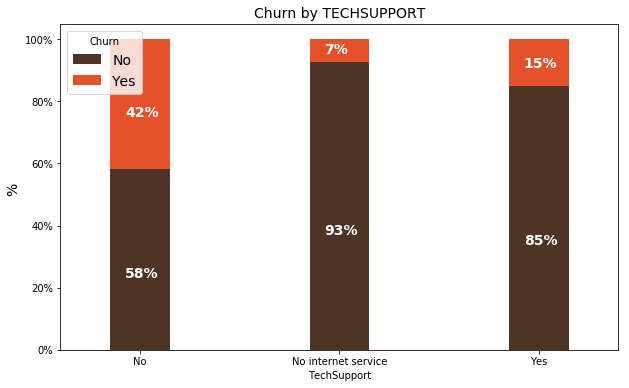

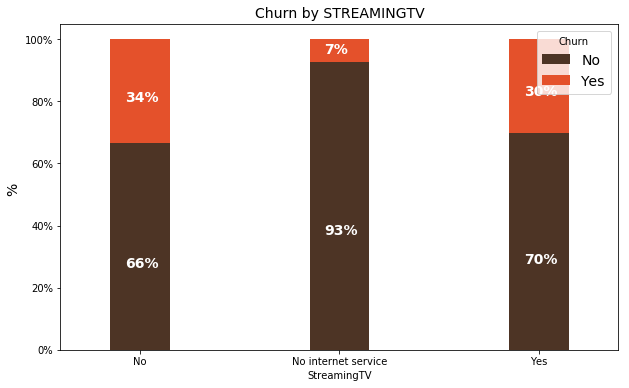

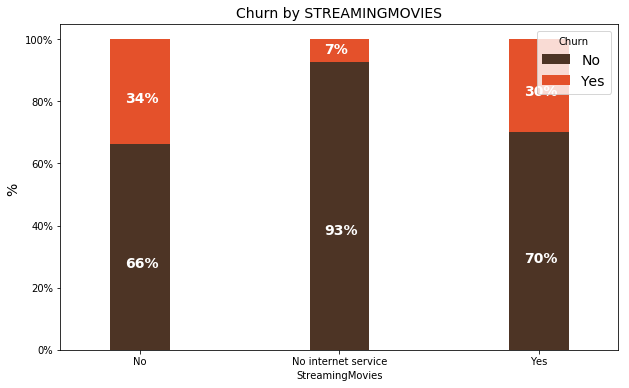

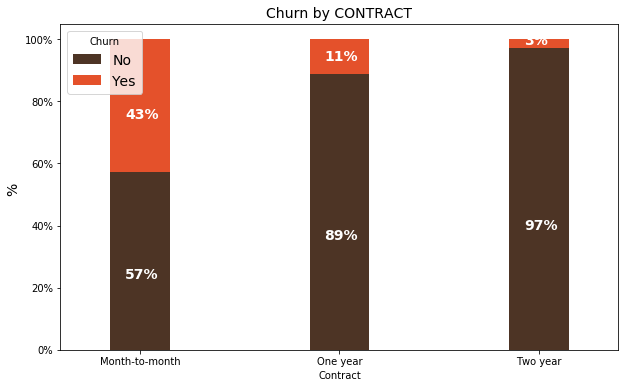

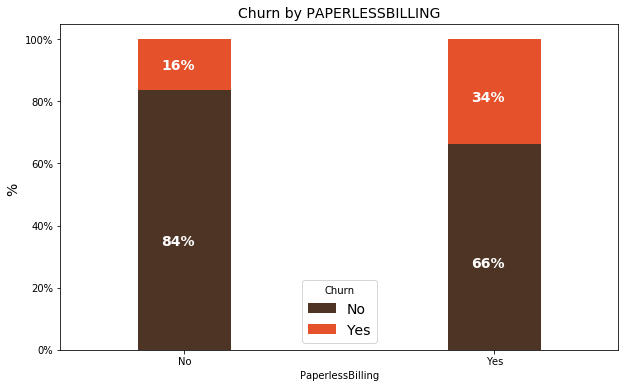

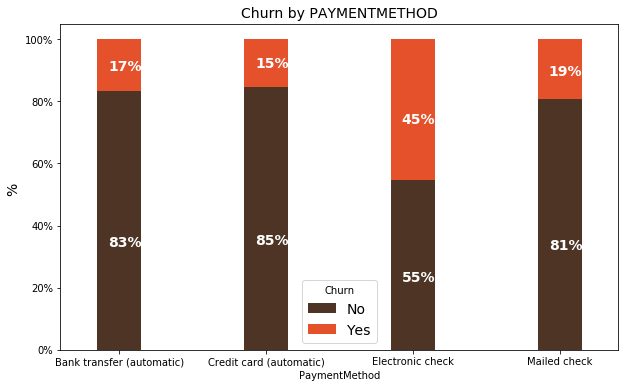

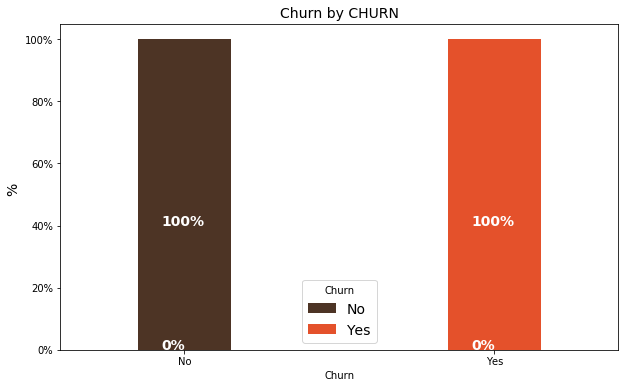

In [12]:
# Checking the count plot of categorical variables along with camparison to Churn
import matplotlib.ticker as mtick 
colors = ['#4D3425','#E4512B']

for i in df.columns:
    if df[i].dtype =='O':
        contract_churn = df.groupby([i,'Churn']).size().unstack()
        ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', 
                                                              width = 0.3, 
                                                              stacked = True, 
                                                              rot = 0, 
                                                              figsize = (10,6), 
                                                              color = colors)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        ax.legend(loc='best',prop={'size':14},title = 'Churn')
        ax.set_ylabel('% ',size = 14)
        ax.set_title('Churn by '+ i.upper() ,size = 14)

        # Code to add the data labels on the stacked bar chart
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                                                                           color = 'white',
                                                                           weight = 'bold',
                                                                           size = 14)

Observation

* Female and Male churn ratio is minimal
* Customers with partner count is higher than people without partners. People without partner are more to churn.
* Customers without dependents are more likely to churn.
* The ratio of customers with multiple lines churning is more when compared to people without multiple lines. 
* Customers who have fiber optic internet service are more likely to churn. 
* Customers who have opted for online security, Device Protection, Tech support and online backup are less likely to churn than   who have not opted. 
* Streaming TV and Streaming movies have no much impact on the churn. Customers who have opted them are little less likely to     churn and the difference is not high.
* Customers who have opted for month to month are highly likely to churn and one year and two year contract customers are not     likely to churn.
* Customers who have opted for paperless billing are likely to churn than those have not opted for it. 
* Customers who make electronic cheque payment are more likely to churn than other payment modes.

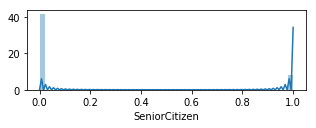

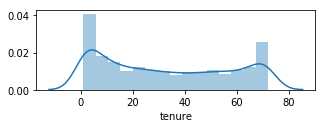

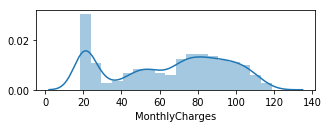

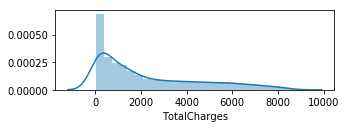

In [13]:
#checking the count plot of numerical variables along with camparison to Churn
for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.subplot(3,1,3)
        sns.distplot(df[i])

Observations

* Tenure is widely distributed 
* Monthly charges are high at 20
* Total charges is right skewed.

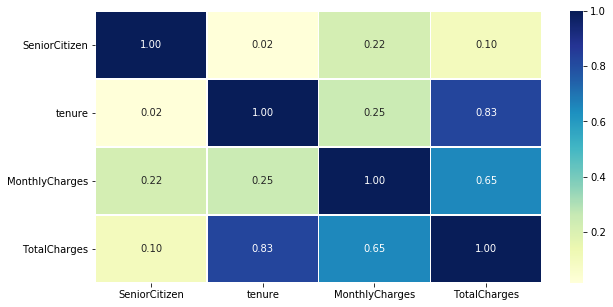

In [14]:
# Let's plot the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

MonthlyCharges and tenure has a positive correlation

In [15]:
# Encoding the data
#from sklearn.preprocessing import LabelEncoder
#lb=LabelEncoder()

#for i in df.columns:
#    if df.columns.dtype=='O':
#        df[i]=lb.fit_transform(df[i].astype(str))

In [22]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [35]:
# Check and remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df_dummies))
print("The datashape before removing outliers: ", df_dummies.shape)
df_final = df_dummies[(z<3).all(axis=1)]
print("The datashape after removing outliers: ", df_final.shape)

The datashape before removing outliers:  (7032, 46)
The datashape after removing outliers:  (6352, 46)


In [36]:
# We will use the data frame where we had created dummy variables
# Lets start modelling
# Split data into X and y
X = df_final.drop("Churn", axis=1)
y = df_final["Churn"]

In [37]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,0,8,99.65,820.50,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,0,22,89.10,1949.40,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0


In [38]:
y.head()

1    0
2    1
4    1
5    1
6    0
Name: Churn, dtype: int64

In [39]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [40]:
#importing necessary libraries
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X = pd.DataFrame(scaler.fit_transform(X))
#X.head()

In [71]:
# Split data into train and test sets
# np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5081, 45), (1271, 45), (5081,), (1271,))

We're going to try 3 different machine learning models:

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [62]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    # np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [74]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8048780487804879,
 'KNN': 0.7568843430369787,
 'Random Forest': 0.7781274586939417,
 'SVC': 0.8009441384736428}

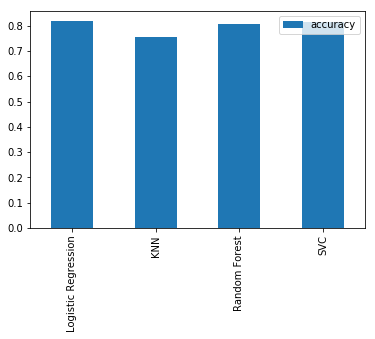

In [64]:
# Compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [76]:
def max_acc_score(reg, x, y):
    max_acc_score=0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size=0.20)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        acc_score=accuracy_score(y_test, pred)
        if acc_score > max_acc_score:
            max_acc_score = acc_score
            final_r_state = r_state
    print("The max accuracy score for", reg, "is: ", max_acc_score, " achieved at", final_r_state)
    return final_r_state

In [77]:
svc = SVC() 
max_acc_score(svc, X, y)


The max accuracy score for SVC() is:  0.8166797797010228  achieved at 52


52

In [78]:
logistic_regression = LogisticRegression()
max_acc_score(logistic_regression, X, y)

The max accuracy score for LogisticRegression() is:  0.8269079464988198  achieved at 55


55

In [79]:
knn = KNeighborsClassifier()
max_acc_score(knn, X, y)

The max accuracy score for KNeighborsClassifier() is:  0.7757671125098348  achieved at 99


99

In [80]:
random_forest = RandomForestClassifier()
max_acc_score(random_forest, X, y)

The max accuracy score for RandomForestClassifier() is:  0.8151062155782848  achieved at 45


45

We're going to tune:

* LogisticRegression()
* SVC()

In [81]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for SVC
svc_grid = {'C':(1,10),'kernel':('linear','poly','rbf')}

In [105]:
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [106]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 206.913808111479}

In [107]:
rs_log_reg.score(X_test, y_test)

0.8072383949645948

In [87]:
# Setup random hyperparameter search for SVC
svc_log_reg = RandomizedSearchCV(SVC(),
                                param_distributions=svc_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True,
                               random_state=52)

# Fit random hyperparameter search model for LogisticRegression
svc_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   35.4s finished


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': (1, 10),
                                        'kernel': ('linear', 'poly', 'rbf')},
                   random_state=52, verbose=True)

In [88]:
svc_log_reg.best_params_

{'kernel': 'linear', 'C': 1}

In [89]:
svc_log_reg.score(X_test, y_test)

0.8040912667191188

#### Here we can see that logistic_regression is giving slightly higher accuracy than SVC, so we can proceed with logistic_regression.

Evaluting the machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
* cross-validation 

To make comparisons and evaluate our trained model, first we need to make predictions.

In [123]:
# Make predictions with tuned model
y_preds = rs_log_reg.predict(X_test)

In [124]:
y_test

148     0
5108    0
2583    0
2836    0
1831    0
4733    0
523     1
6675    0
2129    1
5181    0
3550    1
3367    0
3639    0
5838    0
2785    0
1415    0
512     1
6303    0
842     1
2699    0
2020    0
2956    0
654     1
678     0
4631    1
2040    0
6529    1
2851    0
6428    1
6704    0
       ..
6113    0
1114    0
3081    1
4028    0
763     0
590     0
3739    0
6617    0
722     1
38      1
6184    0
49      0
3678    0
4648    0
1065    1
1539    0
1456    1
5545    0
2488    1
1598    0
6404    0
5478    0
5442    0
5590    0
6612    1
31      0
5061    0
69      0
1153    0
4972    0
Name: Churn, Length: 1271, dtype: int64

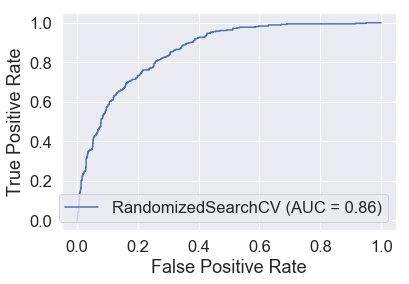

In [125]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test)

In [126]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[826  89]
 [156 200]]


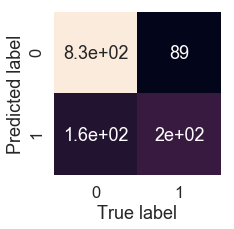

In [127]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

#### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [128]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=206.913808111479,
                         solver="liblinear")

In [129]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.80566483, 0.80959874, 0.78897638, 0.80551181, 0.80629921])

In [130]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8032101947130723

In [131]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.6562731405609932

In [132]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.555016484469894

In [133]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.6013028009261452

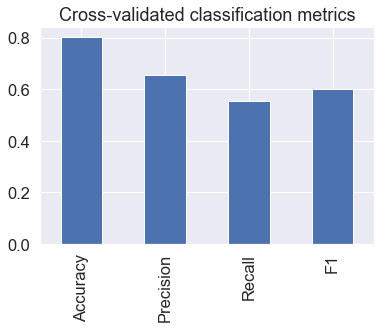

In [134]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);